## **1. Import thư viện các thư viện cần thiết:**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

## **2. Tải bộ dữ liệu**

In [15]:
!gdown 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 44.2MB/s]


## **3. Đọc bộ dữ liệu**

In [16]:
dataset_path = '/content/Housing.csv'
df = pd.read_csv(dataset_path)

## **4. Xử lý dữ liệu categorical:**

In [17]:
# Lấy danh sách các cột phân loại (categorical columns) từ DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

# In danh sách các cột phân loại
print(categorical_cols)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [18]:
# Sau khi đã xác định được đối tượng cần xử lý, ta sẽ sử dụng OrdinalEncoder() để chuyển đổi chúng thành dạng số như sau:

# Khởi tạo OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Áp dụng OrdinalEncoder cho các cột phân loại
encoded_categorical_cols = ordinal_encoder.fit_transform(df[categorical_cols])

# Tạo DataFrame mới từ các cột đã được mã hóa
encoded_categorical_df = pd.DataFrame(
    encoded_categorical_cols,
    columns=categorical_cols
)

# Xóa các cột phân loại khỏi DataFrame gốc
numerical_df = df.drop(categorical_cols, axis=1)

# Kết hợp DataFrame số và DataFrame đã mã hóa
encoded_df = pd.concat(
    [numerical_df, encoded_categorical_df],
    axis=1
)

## **5. Chuẩn hóa bộ dữ liệu:**

In [19]:
# Khởi tạo StandardScaler
normalizer = StandardScaler()

# Áp dụng StandardScaler để chuẩn hóa dữ liệu
dataset_arr = normalizer.fit_transform(encoded_df)

## **6. Tách dữ liệu X, y:**


In [40]:
# Chia dữ liệu đã chuẩn hóa thành các đặc trưng (X) và nhãn (y)
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

## **7. Chia tập dữ liệu train, val:**

In [41]:
# Các tham số cho phân chia dữ liệu
test_size = 0.3
random_state = 1
is_shuffle = True

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

## **8. Huấn luyện mô hình:**

In [42]:
def train_model(model, X, y, random_state=1):
    """
    Huấn luyện mô hình hồi quy.

    Parameters:
    model (class): Lớp mô hình hồi quy từ scikit-learn (ví dụ: RandomForestRegressor).
    X (array-like): Dữ liệu đầu vào (các đặc trưng).
    y (array-like): Giá trị mục tiêu (nhãn).
    random_state (int): Giá trị để đảm bảo tính tái lập của mô hình.

    Returns:
    regressor (model): Mô hình hồi quy đã được huấn luyện.
    """
    # Tạo đối tượng mô hình hồi quy
    regressor = model(random_state=random_state)

    # Huấn luyện mô hình với dữ liệu
    regressor.fit(X, y)

    # Trả về mô hình đã được huấn luyện
    return regressor


## **9. Đánh giá mô hình:**

In [43]:
def evaluate_model(regressor, X_val, y_val):
    """
    Đánh giá mô hình bằng cách tính toán các chỉ số lỗi dự đoán.

    Parameters:
    regressor (sklearn.base.RegressorMixin): Mô hình hồi quy đã được huấn luyện.
    X_val (array-like): Dữ liệu đầu vào.
    y_val (array-like): Giá trị thực tế.

    Returns:
    None
    """
    # Dự đoán giá trị bằng mô hình
    y_pred = regressor.predict(X_val)

    # Tính toán Mean Absolute Error và Mean Squared Error
    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    # In kết quả đánh giá trên tập kiểm tra (validation set)
    print('Evaluation results on validation set:')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')

In [44]:
import matplotlib.pyplot as plt

def plot(X_val, feature, y_val, y_pred, model_name):
    """
    Hàm để vẽ đồ thị so sánh giá trị thực và dự đoán của mô hình.

    Parameters:
    X (array-like): Dữ liệu đầu vào với các đặc trưng.
    feature (int): Chỉ số của đặc trưng cần hiển thị trên trục x.
    y (array-like): Giá trị thực tế.
    y_pred (array-like): Giá trị dự đoán của mô hình.
    model_name (str): Tên của mô hình để hiển thị trong tiêu đề đồ thị.
    """
    plt.figure(figsize=(10, 6))

    # Vẽ các điểm thực tế
    plt.scatter(
        X_val[:, feature], y_val,
        color='blue', label='Ground Truth',
        s=60, edgecolor='k', alpha=0.6
    )

    # Vẽ các điểm dự đoán
    plt.scatter(
        X_val[:, feature], y_pred,
        color='green', label='Prediction',
        s=60, edgecolor='k', alpha=0.6
    )

    # Thiết lập tiêu đề và nhãn cho trục
    plt.title(
        f'{model_name} - {feature} vs Predicted and Actual',
        fontsize=18, weight='bold', color='#333'
    )
    plt.xlabel(f'{feature}', fontsize=14, weight='bold')
    plt.ylabel('Price', fontsize=14, weight='bold')

    # Thiết lập kích thước chữ cho các nhãn trục
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold')

    # Hiển thị chú thích và lưới
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # Tinh chỉnh bố cục đồ thị
    plt.tight_layout()

    # Hiển thị đồ thị
    plt.show()


## **10. Chạy chương trình**

Decision Tree:
Evaluation results on validation set:
Mean Absolute Error: 0.594233095728814
Mean Squared Error: 0.7245255619360014


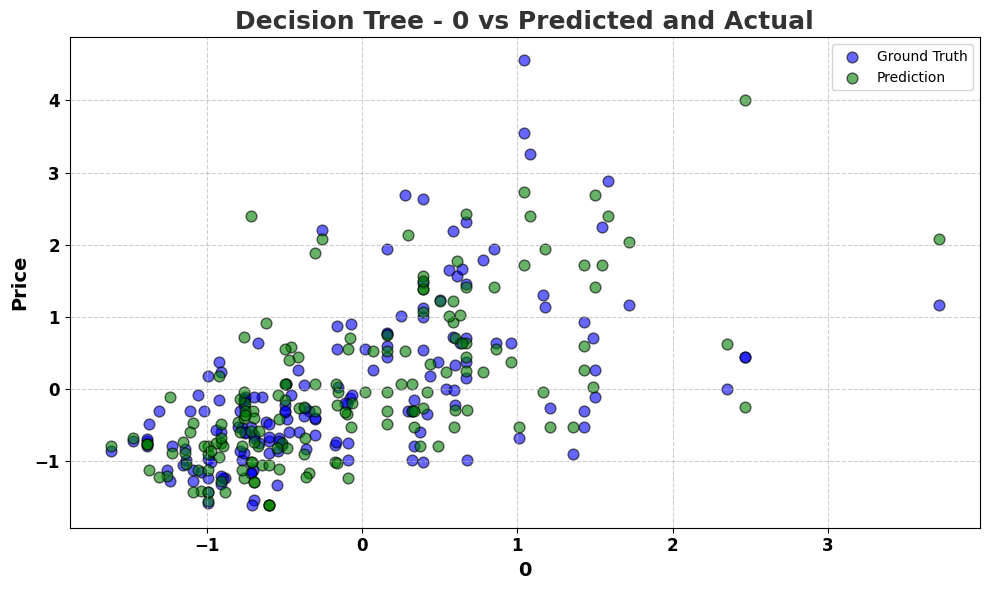


Random Forest:
Evaluation results on validation set:
Mean Absolute Error: 0.46093873321571177
Mean Squared Error: 0.37944418523089524


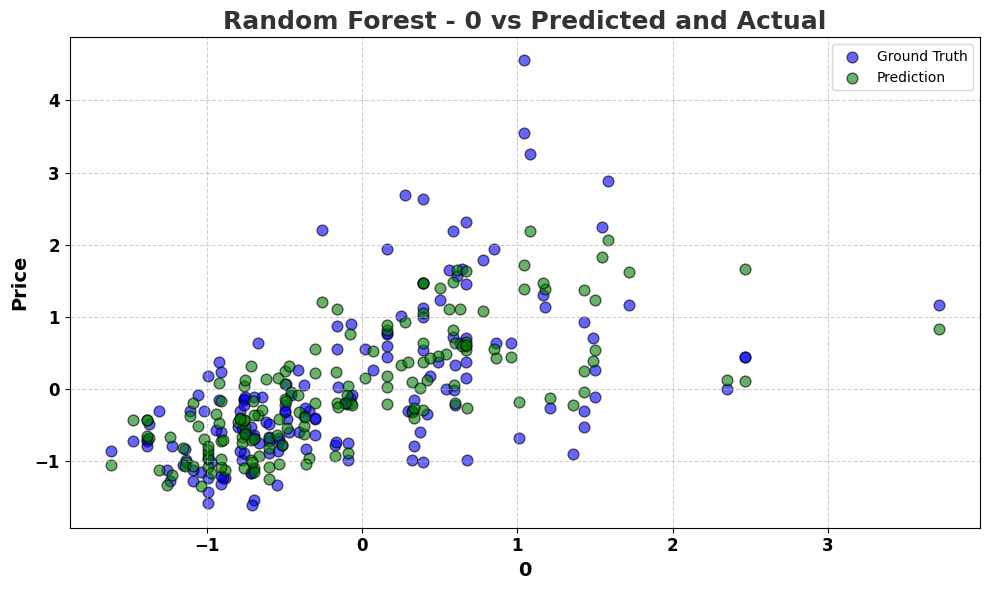


AdaBoost:
Evaluation results on validation set:
Mean Absolute Error: 0.567680019897059
Mean Squared Error: 0.5739244030038942


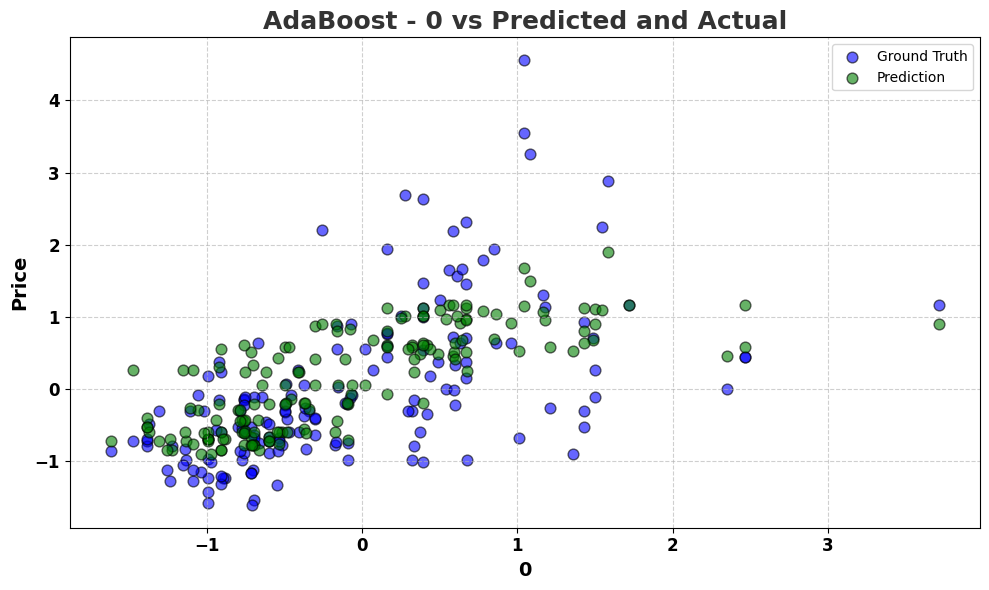


Gradient Boosting:
Evaluation results on validation set:
Mean Absolute Error: 0.4516626127750995
Mean Squared Error: 0.39610445936979427


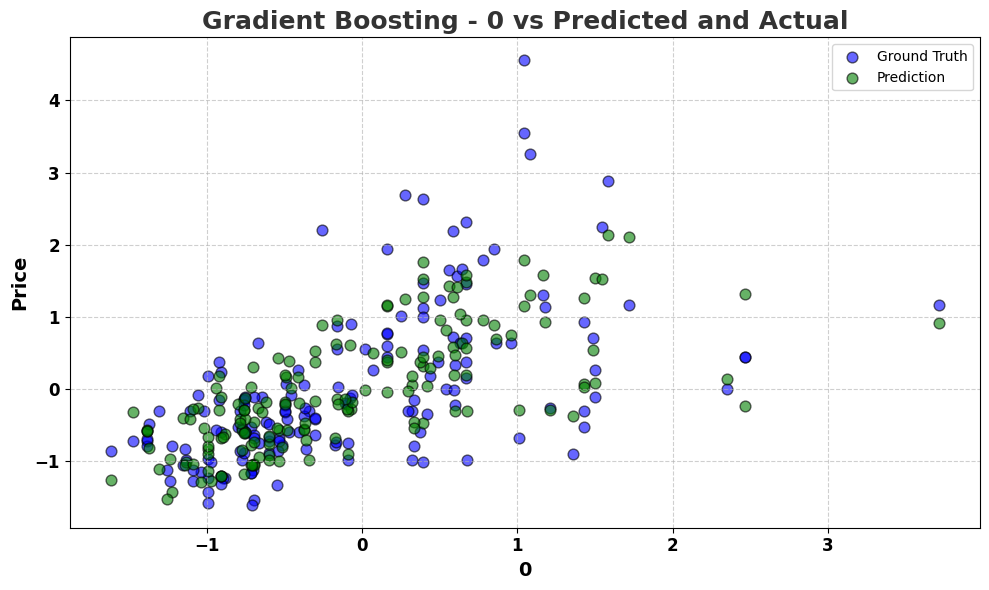

In [45]:
def main():
    # Tách dữ liệu thành tập huấn luyện và tập kiểm tra

    # Train and evaluate Decision Tree
    dt_model = train_model(DecisionTreeRegressor, X_train, y_train)
    print('Decision Tree:')
    evaluate_model(dt_model, X_val, y_val)
    plot(X_val, 0, y_val, dt_model.predict(X_val), 'Decision Tree')

    # Train and evaluate Random Forest
    rf_model = train_model(RandomForestRegressor, X_train, y_train)
    print("\nRandom Forest:")
    evaluate_model(rf_model, X_val, y_val)
    plot(X_val, 0, y_val, rf_model.predict(X_val), 'Random Forest')

    # Train and evaluate AdaBoost
    ab_model = train_model(AdaBoostRegressor, X_train, y_train)
    print("\nAdaBoost:")
    evaluate_model(ab_model, X_val, y_val)
    plot(X_val, 0, y_val, ab_model.predict(X_val), 'AdaBoost')

    # Train and evaluate Gradient Boosting
    gb_model = train_model(GradientBoostingRegressor, X_train, y_train)
    print("\nGradient Boosting:")
    evaluate_model(gb_model, X_val, y_val)
    plot(X_val, 0, y_val, gb_model.predict(X_val), 'Gradient Boosting')


if __name__ == '__main__':
    main()